In [1]:
import pandas as pd
import numpy as np
import os
import json
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from itertools import product
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/User/Desktop/Python/Data30.csv', sep=";")
df

,Policy,yG,yIn,yPi,yU,r,U-8,Y-8,Yr-8,C-8,...,U,Y,Growth,CPI,In,InR,Pi,PiR,Deb,Gini
0,1country-p0,0.0,0.0,0.00,0.00,0.0050,0.0700,1767613.342,1.260673e+06,1.459991e+06,...,0.0838,2027485.652,0.065972,1.720362,1727950.758,1.004411e+06,305991.9582,177864.84890,3.557405,0.197288
1,1country-p0,0.0,0.0,0.00,0.00,0.0050,0.0552,2159344.291,1.475312e+06,1.771117e+06,...,0.0634,2340870.703,0.048124,1.749143,1995892.418,1.141069e+06,363755.1360,207961.94840,3.274980,0.204952
2,1country-p0,0.0,0.0,0.00,0.00,0.0050,0.1378,1525747.371,1.063048e+06,1.341039e+06,...,0.0452,1950752.861,0.144288,1.776093,1636470.543,9.213881e+05,303377.1019,170811.54020,3.776751,0.185090
3,1country-p0,0.0,0.0,0.00,0.00,0.0050,0.2250,1095513.541,7.961295e+05,9.520544e+05,...,0.0842,1409756.470,0.139152,1.644339,1202242.417,7.311401e+05,202841.5703,123357.48150,5.532918,0.176241
4,1country-p0,0.0,0.0,0.00,0.00,0.0050,0.1434,1595656.175,1.140445e+06,1.377761e+06,...,0.0692,1942844.669,0.121321,1.708837,1652359.387,9.669497e+05,293176.3673,171564.85880,4.105299,0.191467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1country-p4029,0.0,0.0,0.01,0.01,0.0125,0.0584,1361683.054,1.013075e+06,1.135110e+06,...,0.0450,1655061.042,0.107446,1.682220,1427873.465,8.488032e+05,200066.5452,118930.09170,3.950405,0.163205
29996,1country-p4029,0.0,0.0,0.01,0.01,0.0125,0.0746,1347193.985,9.536083e+05,1.139672e+06,...,0.0858,1483908.276,0.071059,1.668065,1326621.048,7.953053e+05,159462.0191,95596.99881,4.189787,0.180427
29997,1country-p4029,0.0,0.0,0.01,0.01,0.0125,0.1112,1303774.004,9.798066e+05,1.096790e+06,...,0.0370,1584578.465,0.092193,1.646522,1360677.869,8.263952e+05,201465.4217,122358.17010,4.129867,0.165975
29998,1country-p4029,0.0,0.0,0.01,0.01,0.0125,0.0642,1789660.534,1.274180e+06,1.475860e+06,...,0.0386,2158542.435,0.103182,1.733324,1854238.298,1.069759e+06,280984.7781,162107.47370,3.155506,0.145088


In [5]:
X = df.iloc[:, 1:-10].values
y = df['Pi'].values

In [7]:
config_path = r'C:\Users\User\Desktop\Python\PyTorch\Modelli\CPI\Configurazione\best_config.txt'
weights_path = r'C:\Users\User\Desktop\Python\PyTorch\Modelli\CPI\Pesi\best_weights.pth'

In [17]:
X_train, X2, y_train, y2 = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X2, y2, test_size=0.5, random_state=1)


# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_val = scaler.transform(X_val).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)
y_train = y_train.astype(np.float32).reshape(-1, 1)
y_val = y_val.astype(np.float32).reshape(-1, 1)
y_test = y_test.astype(np.float32).reshape(-1, 1)

bs = 256
# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
val_dataset = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))
test_dataset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))
train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=bs, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=bs, shuffle=False)

In [19]:
# Define the neural network class
class RegressionNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size=1, dropout_rate=0):
        super(RegressionNN, self).__init__()
        layers = []
        in_features = input_size
        
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(in_features, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            in_features = hidden_size
        
        layers.append(nn.Linear(in_features, output_size))
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.model(x)

In [21]:
# Grid search over number of layers and neurons
layer_counts = [4, 5, 6, 7, 8, 9, 10]
neuron_counts = [40, 50, 60, 70, 80]
dropout_rate = 0

best_val_loss = float('inf')
best_model_config = None
best_model_weights = None

for num_layers, num_neurons in product(layer_counts, neuron_counts):
    hidden_sizes = [num_neurons] * num_layers
    print(f"Training model with {num_layers} layers and {num_neurons} neurons per layer...")
    
    # Initialize the model
    model = RegressionNN(input_size=X_train.shape[1], hidden_sizes=hidden_sizes, dropout_rate=dropout_rate)
    criterion = nn.MSELoss()
    criterion2 = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
    
    # Training loop
    num_epochs = 150
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation step
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        
        print(f"Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss:.6f}")
        
        # Save the best weights for this configuration
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_config = hidden_sizes
            best_model_weights = model.state_dict()
            # Save weights
            os.makedirs(os.path.dirname(weights_path), exist_ok=True)
            torch.save(best_model_weights, weights_path)

# Save the best configuration
os.makedirs(os.path.dirname(config_path), exist_ok=True)
with open(config_path, 'w') as f:
    f.write(f"Best Configuration: {best_model_config}\nValidation Loss: {best_val_loss:.6f}")

print(f"Best Configuration: {best_model_config}")
print(f"Validation Loss: {best_val_loss:.6f}")


Training model with 6 layers and 50 neurons per layer...
Epoch 1/160, Validation Loss: 0.001536
Epoch 2/160, Validation Loss: 0.000907
Epoch 3/160, Validation Loss: 0.001488
Epoch 4/160, Validation Loss: 0.000587
Epoch 5/160, Validation Loss: 0.000892
Epoch 6/160, Validation Loss: 0.000515
Epoch 7/160, Validation Loss: 0.001756
Epoch 8/160, Validation Loss: 0.000961
Epoch 9/160, Validation Loss: 0.000389
Epoch 10/160, Validation Loss: 0.000402
Epoch 11/160, Validation Loss: 0.000382
Epoch 12/160, Validation Loss: 0.000336
Epoch 13/160, Validation Loss: 0.000882
Epoch 14/160, Validation Loss: 0.000326
Epoch 15/160, Validation Loss: 0.000466
Epoch 16/160, Validation Loss: 0.001442
Epoch 17/160, Validation Loss: 0.002452
Epoch 18/160, Validation Loss: 0.000305
Epoch 19/160, Validation Loss: 0.000444
Epoch 20/160, Validation Loss: 0.000596
Epoch 21/160, Validation Loss: 0.000350
Epoch 22/160, Validation Loss: 0.000900
Epoch 23/160, Validation Loss: 0.000416
Epoch 24/160, Validation Loss: 0

In [23]:
# Load the best model and weights for testing
with open(config_path, 'r') as f:
    config_details = f.read()
print("Loaded Configuration Details:")
print(config_details)

# Initialize the model with the best configuration
best_model = RegressionNN(input_size=X_train.shape[1], hidden_sizes=best_model_config, dropout_rate=dropout_rate)
best_model.load_state_dict(torch.load(weights_path))

# Evaluate on the test set
best_model.eval()
test_loss = 0
abs_test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        predictions = best_model(X_batch)
        loss = criterion(predictions, y_batch)
        abs_loss = criterion2(predictions, y_batch)
        test_loss += loss.item()
        abs_test_loss += abs_loss.item()
test_loss /= len(test_loader)
abs_test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.6f}  Test Absolute Loss: {abs_test_loss:.6f} ")

Loaded Configuration Details:
Best Configuration: [60, 60, 60, 60, 60, 60]
Validation Loss: 0.000157


C:\Users\User\AppData\Local\Temp\ipykernel_19060\3127276678.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(weights_path))


Test Loss: 0.000157  Test Absolute Loss: 0.009745 


## XGBoost

In [13]:
X = df.iloc[:, 1:-10].values
y = df['Growth'].values

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ParameterGrid

In [17]:
X_train, X2, y_train, y2 = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X2, y2, test_size=0.5, random_state=1)

In [19]:
param_grid = {
    'max_depth': [5, 6, 7, 8],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 150, 200, 300],
}

# Grid Search over hyperparameters
best_params = None
lowest_val_mse = float("inf")

for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")
    
    # Train the model with the current parameters
    model = xgb.XGBRegressor(
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        n_estimators=params['n_estimators'],
        random_state=1
    )
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        #early_stopping_rounds=10,  # Stop early if no improvement
        verbose=False
    )
    
    # Calculate validation MSE
    val_predictions = model.predict(X_val)
    val_mse = mean_squared_error(y_val, val_predictions)
    print(f"Validation MSE: {val_mse:.6f}")
    
    # Check if this is the best model so far
    if val_mse < lowest_val_mse:
        lowest_val_mse = val_mse
        best_params = params
        best_model = model

print("\nBest Parameters:")
print(best_params)
print(f"Lowest Validation MSE: {lowest_val_mse:.6f}")

# Step 4: Evaluate the best model on the test set
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"\nTest MSE: {test_mse:.6f}")
print(f"Test MAE: {test_mae:.6f}")

Testing parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Validation MSE: 0.000664
Testing parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Validation MSE: 0.000601
Testing parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Validation MSE: 0.000572
Testing parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Validation MSE: 0.000551
Testing parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Validation MSE: 0.000599
Testing parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
Validation MSE: 0.000560
Testing parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Validation MSE: 0.000551
Testing parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
Validation MSE: 0.000549
Testing parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Validation MSE: 0.000579
Testing parameters: {'learning_rate': 0.1, 'max_depth':

In [21]:
import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance


X = df.iloc[:, 1:-10]
y = df['Growth']

model = XGBRegressor(max_depth=6, n_estimators=300, learning_rate=0.1)
model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}>

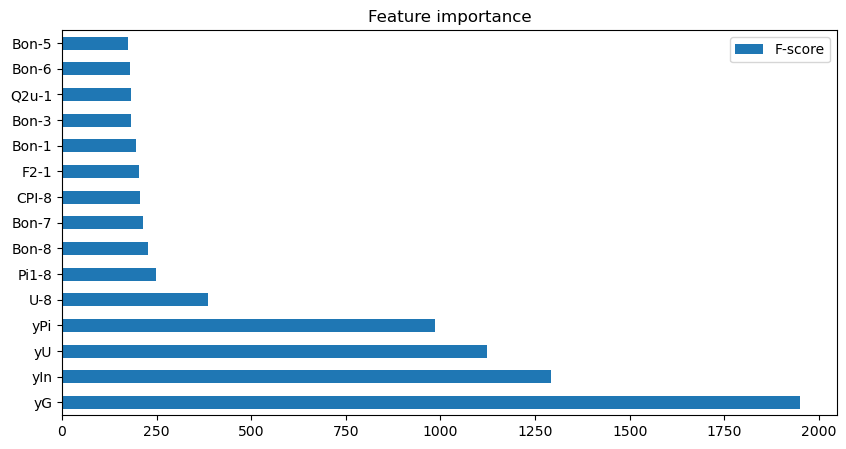

In [25]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["F-score"]).sort_values(by = "F-score", ascending=True)
data.nlargest(15, columns="F-score").plot(kind='barh', figsize = (10,5), title="Feature importance") 

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X2, y_train, y2 = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X2, y2, test_size=0.5, random_state=1)

In [37]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [20, 50, None],
    'min_samples_split': [2, 4],
    #'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']  # Corrected parameter options
}

# Step 3: Grid Search over hyperparameters
best_params = None
lowest_val_mse = float("inf")

for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")
    
    # Train the model with the current parameters
    model = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        #min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        random_state=1,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    
    # Calculate validation MSE
    val_predictions = model.predict(X_val)
    val_mse = mean_squared_error(y_val, val_predictions)
    print(f"Validation MSE: {val_mse:.6f}")
    
    # Check if this is the best model so far
    if val_mse < lowest_val_mse:
        lowest_val_mse = val_mse
        best_params = params
        best_model = model

print("\nBest Parameters:")
print(best_params)
print(f"Lowest Validation MSE: {lowest_val_mse:.6f}")

# Step 4: Evaluate the best model on the test set
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"\nTest MSE: {test_mse:.6f}")
print(f"Test MAE: {test_mae:.6f}")

Testing parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Validation MSE: 0.000370
Testing parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Validation MSE: 0.000369
Testing parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}
Validation MSE: 0.000369
Testing parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}
Validation MSE: 0.000376
Testing parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 200}
Validation MSE: 0.000376
Testing parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 500}
Validation MSE: 0.000376
Testing parameters: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Validation MSE: 0.000374
Testing parameters: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_s

### SVM

In [81]:
y = df['Pi'].values

In [83]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X2, y_train, y2 = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X2, y2, test_size=0.5, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [85]:
param_grid = {
    'C': [0.1, 0.5, 1, 3],              # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5 ],      # Epsilon in the epsilon-SVR model
    'kernel': ['linear', 'rbf']     
}

# Step 4: Grid Search over hyperparameters
best_params = None
lowest_val_mse = float("inf")

for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")
    
    # Train the model with the current parameters
    model = SVR(
        C=params['C'],
        epsilon=params['epsilon'],
        kernel=params['kernel']
    )
    model.fit(X_train, y_train)
    
    # Calculate validation MSE
    val_predictions = model.predict(X_val)
    val_mse = mean_squared_error(y_val, val_predictions)
    print(f"Validation MSE: {val_mse:.6f}")
    
    # Check if this is the best model so far
    if val_mse < lowest_val_mse:
        lowest_val_mse = val_mse
        best_params = params
        best_model = model

print("\nBest Parameters:")
print(best_params)
print(f"Lowest Validation MSE: {lowest_val_mse:.6f}")

# Step 5: Evaluate the best model on the test set
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"\nTest MSE: {test_mse:.6f}")
print(f"Test MAE: {test_mae:.6f}")

Testing parameters: {'C': 3, 'epsilon': 0.01, 'kernel': 'linear'}
Validation MSE: 770146639.007987
Testing parameters: {'C': 3, 'epsilon': 0.01, 'kernel': 'rbf'}
Validation MSE: 4044376364.132330

Best Parameters:
{'C': 3, 'epsilon': 0.01, 'kernel': 'linear'}
Lowest Validation MSE: 770146639.007987

Test MSE: 781001169.766642
Test MAE: 19589.900949


### KNN

In [11]:
X = df.iloc[:, 1:-10].values
y = df['Pi'].values

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X2, y_train, y2 = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X2, y2, test_size=0.5, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [15]:
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 10],
    'p': [1, 2],  # p=1 for Manhattan distance, p=2 for Euclidean distance
    'weights': ['uniform', 'distance']
}

# Step 3: Grid Search over hyperparameters
best_params = None
lowest_val_mse = float("inf")

for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")
    
    # Train the model with the current parameters
    model = KNeighborsRegressor(
        n_neighbors=params['n_neighbors'],
        p=params['p'],
        weights=params['weights']
    )
    model.fit(X_train, y_train)
    
    # Calculate validation MSE
    val_predictions = model.predict(X_val)
    val_mse = mean_squared_error(y_val, val_predictions)
    print(f"Validation MSE: {val_mse:.6f}")
    
    # Check if this is the best model so far
    if val_mse < lowest_val_mse:
        lowest_val_mse = val_mse
        best_params = params
        best_model = model

print("\nBest Parameters:")
print(best_params)
print(f"Lowest Validation MSE: {lowest_val_mse:.6f}")

# Step 4: Evaluate the best model on the test set
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"\nTest MSE: {test_mse:.6f}")
print(f"Test MAE: {test_mae:.6f}")

Testing parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Validation MSE: 673843955.441487
Testing parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Validation MSE: 693011583.422729
Testing parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Validation MSE: 671975644.124603
Testing parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Validation MSE: 682014506.515200
Testing parameters: {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
Validation MSE: 643756421.117599
Testing parameters: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Validation MSE: 654672375.988829
Testing parameters: {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
Validation MSE: 642595362.946812
Testing parameters: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Validation MSE: 644789677.561418
Testing parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Validation MSE: 634858736.495756
Testing parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Validation MSE: 637944970.250759
Testing parameters: {'n_neighbors': 5, 'p': 